In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../../../data/raw/nb_data/6. Nan_removed/gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.05,7000.0,3,3,3,3.0,Relatively New,1618.0,0,0,1,0,0,2,79
1,flat,m3m the marina,sector 68,1.45,9615.0,3,2,3+,9.0,New Property,1365.0,0,0,0,0,0,2,0
2,house,bptp astaire gardens,sector 70a,1.18,8138.0,3,3,3+,2.0,Relatively New,1611.0,0,0,0,0,1,1,153
3,flat,cghs airport apartment,sector 47,1.65,7857.0,3,3,3,1.0,Old Property,1906.0,0,0,0,0,1,1,136
4,flat,m3m woodshire,sector 107,1.65,5961.0,4,5,3+,12.0,Relatively New,2505.0,0,1,0,0,0,2,21


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 83,1.05,3,3,3,3.0,Relatively New,1618.0,0,0,1,0,0,2,79
1,flat,sector 68,1.45,3,2,3+,9.0,New Property,1365.0,0,0,0,0,0,2,0
2,house,sector 70a,1.18,3,3,3+,2.0,Relatively New,1611.0,0,0,0,0,1,1,153
3,flat,sector 47,1.65,3,3,3,1.0,Old Property,1906.0,0,0,0,0,1,1,136
4,flat,sector 107,1.65,4,5,3+,12.0,Relatively New,2505.0,0,1,0,0,0,2,21


### luxury score

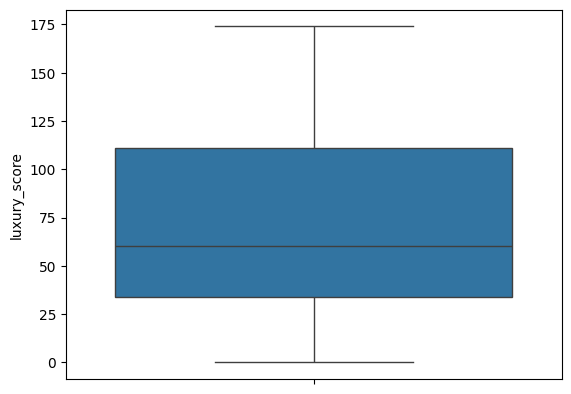

In [8]:
sns.boxplot(df['luxury_score'])
plt.show()

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 83,1.05,3,3,3,3.0,Relatively New,1618.0,0,0,1,0,0,2,79,Medium
1,flat,sector 68,1.45,3,2,3+,9.0,New Property,1365.0,0,0,0,0,0,2,0,Low
2,house,sector 70a,1.18,3,3,3+,2.0,Relatively New,1611.0,0,0,0,0,1,1,153,High
3,flat,sector 47,1.65,3,3,3,1.0,Old Property,1906.0,0,0,0,0,1,1,136,Medium
4,flat,sector 107,1.65,4,5,3+,12.0,Relatively New,2505.0,0,1,0,0,0,2,21,Low


### floorNum

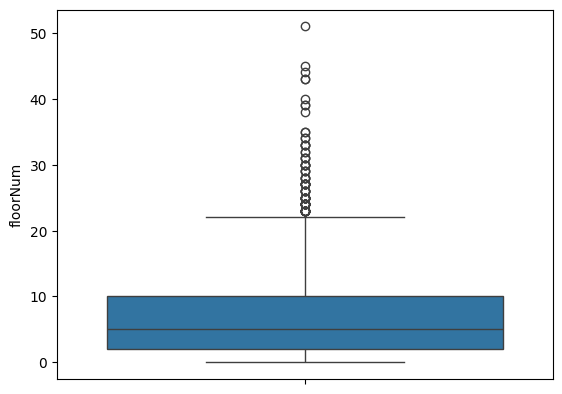

In [12]:
sns.boxplot(df['floorNum'])
plt.show()

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 83,1.05,3,3,3,3.0,Relatively New,1618.0,0,0,1,0,0,2,79,Medium,Mid Floor
1,flat,sector 68,1.45,3,2,3+,9.0,New Property,1365.0,0,0,0,0,0,2,0,Low,Mid Floor
2,house,sector 70a,1.18,3,3,3+,2.0,Relatively New,1611.0,0,0,0,0,1,1,153,High,Low Floor
3,flat,sector 47,1.65,3,3,3,1.0,Old Property,1906.0,0,0,0,0,1,1,136,Medium,Low Floor
4,flat,sector 107,1.65,4,5,3+,12.0,Relatively New,2505.0,0,1,0,0,0,2,21,Low,High Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 83,1.05,3,3,3,Relatively New,1618.0,0,0,1,0,0,2,Medium,Mid Floor
1,flat,sector 68,1.45,3,2,3+,New Property,1365.0,0,0,0,0,0,2,Low,Mid Floor
2,house,sector 70a,1.18,3,3,3+,Relatively New,1611.0,0,0,0,0,1,1,High,Low Floor
3,flat,sector 47,1.65,3,3,3,Old Property,1906.0,0,0,0,0,1,1,Medium,Low Floor
4,flat,sector 107,1.65,4,5,3+,Relatively New,2505.0,0,1,0,0,0,2,Low,High Floor


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56', 'sector 57', 'sector 58', 'sector

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,93.0,3,3,3.0,3.0,1618.0,0,0,1,0,0,2,2.0,2.0
1,0.0,75.0,3,2,4.0,1.0,1365.0,0,0,0,0,0,2,1.0,2.0
2,1.0,79.0,3,3,4.0,3.0,1611.0,0,0,0,0,1,1,0.0,1.0
3,0.0,51.0,3,3,3.0,2.0,1906.0,0,0,0,0,1,1,2.0,1.0
4,0.0,9.0,4,5,4.0,3.0,2505.0,0,1,0,0,0,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,67.0,3,3,3.0,4.0,1639.0,0,0,1,0,0,2,1.0,1.0
3550,0.0,109.0,2,2,2.0,3.0,711.0,0,0,0,0,0,2,1.0,2.0
3551,0.0,90.0,4,5,4.0,3.0,2577.0,0,1,0,0,0,0,0.0,2.0
3552,0.0,71.0,4,4,3.0,3.0,1650.0,1,0,0,0,0,1,2.0,1.0


In [20]:
y_label

0       1.05
1       1.45
2       1.18
3       1.65
4       1.65
        ... 
3549    2.54
3550    0.30
3551    3.50
3552    2.80
3553    2.80
Name: price, Length: 3554, dtype: float64

### Technique 1 - Correlation Analysis

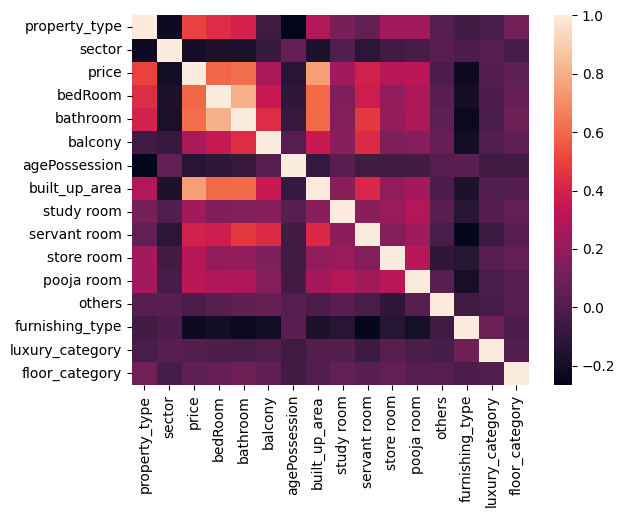

In [21]:
sns.heatmap(data_label_encoded.corr(numeric_only=True))
plt.show()

In [22]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.202935
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.132543
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.650675
1,sector,0.103478
0,property_type,0.099266
2,bedRoom,0.028214
3,bathroom,0.023624
8,servant room,0.020096
5,agePossession,0.014895
4,balcony,0.012920
12,furnishing_type,0.010467
7,study room,0.009643


### Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.684234
1,sector,0.100359
0,property_type,0.096550
2,bedRoom,0.038560
3,bathroom,0.035004
8,servant room,0.022344
9,store room,0.009511
5,agePossession,0.004426
7,study room,0.003926
12,furnishing_type,0.002760


### Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.742195
0,property_type,0.173420
1,sector,0.123296
8,servant room,0.010883
4,balcony,0.005452
10,pooja room,0.002626
7,study room,0.002456
14,floor_category,0.000639
11,others,0.000556
5,agePossession,0.000553


### Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.511081
0,property_type,0.716883
3,bathroom,0.276148
9,store room,0.199220
7,study room,0.171828
8,servant room,0.161980
10,pooja room,0.074029
13,luxury_category,0.054747
2,bedRoom,0.013837
5,agePossession,-0.000000


### Technique 6 - RFE

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.645636
1,sector,0.107502
0,property_type,0.101855
2,bedRoom,0.028415
3,bathroom,0.022556
8,servant room,0.018851
5,agePossession,0.014613
4,balcony,0.012106
12,furnishing_type,0.010593
7,study room,0.008591


### Technique 7 - Linear Regression Weights

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.513623
0,property_type,0.717325
3,bathroom,0.282649
9,store room,0.203628
7,study room,0.179772
8,servant room,0.171282
10,pooja room,0.077033
13,luxury_category,0.066262
2,bedRoom,0.016616
5,agePossession,0.002509


### Technique 8 - SHAP

In [31]:
!pip install shap

  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
   ---------------------------------------- 0.0/455.7 kB ? eta -:--:--
   ----------------------- ---------------- 266.2/455.7 kB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 455.7/455.7 kB 7.2 MB/s eta 0:00:00
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------- ------------------------ 1.0/2.7 MB 64.6 MB/s eta 0:00:01
   --------------------------------- ------ 2.3/2.7 MB 29.3 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 24.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/28.1 MB 32.7 MB/s eta 0:00:01
   -- ------------------------------------- 2.0/28.1 MB 32.5 MB/s eta 0:00:01
   -- ------------------------------------- 2.0/28.1 MB 32.5 MB/s eta 0:00:01
   ---- ---------------------------------

In [33]:
%pip install --upgrade jupyter ipywidgets
%jupyter nbextension enable --py widgetsnbextension # removed !pip on the recommendation of a comment.

  Using cached nbconvert-7.16.4-py3-none-any.whl.metadata (8.5 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached nbclient-0.10.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached pandocfilters-1.5.1-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached tinycss2-1.3.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached anyio-4.4.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jupyter_events-0.10.0-py3-non

UsageError: Line magic function `%jupyter` not found.


In [34]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.22654057, -0.451662  , -0.02510875, ..., -0.02624855,
        -0.01444374, -0.00525054],
       [-0.20223548,  0.08275788, -0.00947282, ..., -0.01032821,
         0.01002654,  0.02600583],
       [ 0.52910574, -0.64763305, -0.03735085, ...,  0.01436622,
         0.0254873 , -0.00586678],
       ...,
       [-0.34663703, -0.16329587,  0.05624549, ...,  0.25529825,
         0.0465998 , -0.04028902],
       [-0.20301803,  0.83121813,  0.02181291, ...,  0.00484174,
         0.01657278, -0.01573498],
       [-0.34585657,  0.04666936, -0.02300821, ..., -0.06981311,
         0.00525965,  0.06902383]])

In [35]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.254302
0,property_type,0.469832
1,sector,0.381148
3,bathroom,0.105138
8,servant room,0.096288
2,bedRoom,0.065998
4,balcony,0.041038
12,furnishing_type,0.029543
5,agePossession,0.027196
14,floor_category,0.022673


In [36]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [321]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.212084,0.102670,0.102730,0.178881,-0.069634,0.101125,-0.078657,0.383640
bedRoom,0.591289,0.024041,0.037717,0.018006,0.014170,0.028456,0.016790,0.049731
bathroom,0.609777,0.025882,0.036402,0.019884,0.275042,0.025066,0.281976,0.112811
balcony,0.269637,0.012576,0.001922,-0.000432,-0.043562,0.012499,-0.066353,0.040327
agePossession,-0.134171,0.014519,0.004332,0.004970,-0.000000,0.014674,-0.002041,0.027312
built_up_area,0.748574,0.650541,0.677623,0.736026,1.510173,0.650518,1.512629,1.255552
study room,0.242955,0.008383,0.003033,-0.018027,0.171846,0.007592,0.180048,0.019533
servant room,0.391930,0.019320,0.023342,0.021018,0.160601,0.019660,0.169605,0.095577
store room,0.305677,0.008329,0.010356,0.002150,0.199655,0.008032,0.204159,0.017123


In [37]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [38]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.068527,0.114882,0.111085,0.140590,-0.026657,0.119694,-0.030926,0.182176
bedRoom,0.199665,0.031324,0.042681,-0.002523,0.006342,0.031638,0.007649,0.031545
bathroom,0.205908,0.026228,0.038744,-0.001030,0.126575,0.025114,0.130115,0.050253
balcony,0.091050,0.014344,0.001696,0.006216,-0.019507,0.013479,-0.030065,0.019615
agePossession,-0.044757,0.016536,0.004899,0.000631,-0.000000,0.016270,0.001155,0.012999
built_up_area,0.252777,0.722383,0.757357,0.846299,0.692620,0.718855,0.696785,0.599513
study room,0.082040,0.010705,0.004345,0.002800,0.078759,0.009566,0.082757,0.009167
servant room,0.132346,0.022311,0.024732,0.012409,0.074245,0.020989,0.078848,0.046022
store room,0.103220,0.008267,0.010528,-0.003139,0.091315,0.007237,0.093739,0.007840


In [39]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.728881
sector             0.133685
bathroom           0.027862
bedRoom            0.026933
servant room       0.025293
balcony            0.011070
agePossession      0.010267
furnishing_type    0.007604
study room         0.007317
store room         0.006147
floor_category     0.004903
luxury_category    0.004088
pooja room         0.003970
others             0.001981
dtype: float64

In [42]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,93.0,3,3,3.0,3.0,1618.0,0,0,1,0,0,2,2.0,2.0
1,0.0,75.0,3,2,4.0,1.0,1365.0,0,0,0,0,0,2,1.0,2.0
2,1.0,79.0,3,3,4.0,3.0,1611.0,0,0,0,0,1,1,0.0,1.0
3,0.0,51.0,3,3,3.0,2.0,1906.0,0,0,0,0,1,1,2.0,1.0
4,0.0,9.0,4,5,4.0,3.0,2505.0,0,1,0,0,0,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,67.0,3,3,3.0,4.0,1639.0,0,0,1,0,0,2,1.0,1.0
3550,0.0,109.0,2,2,2.0,3.0,711.0,0,0,0,0,0,2,1.0,2.0
3551,0.0,90.0,4,5,4.0,3.0,2577.0,0,1,0,0,0,0,0.0,2.0
3552,0.0,71.0,4,4,3.0,3.0,1650.0,1,0,0,0,0,1,2.0,1.0


In [43]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [44]:
scores.mean()

0.8088743891600464

In [45]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [46]:
scores.mean()

0.8077821189634262

In [47]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [48]:
export_df.to_csv('../../../data/raw/nb_data/7. feature-selection/gurgaon_properties_post_feature_selection.csv', index=False)

In [49]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,93.0,3,3,3.0,3.0,1618.0,0,1,2,2.0,2.0,1.05
1,0.0,75.0,3,2,4.0,1.0,1365.0,0,0,2,1.0,2.0,1.45
2,1.0,79.0,3,3,4.0,3.0,1611.0,0,0,1,0.0,1.0,1.18
3,0.0,51.0,3,3,3.0,2.0,1906.0,0,0,1,2.0,1.0,1.65
4,0.0,9.0,4,5,4.0,3.0,2505.0,1,0,2,1.0,0.0,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,67.0,3,3,3.0,4.0,1639.0,0,1,2,1.0,1.0,2.54
3550,0.0,109.0,2,2,2.0,3.0,711.0,0,0,2,1.0,2.0,0.30
3551,0.0,90.0,4,5,4.0,3.0,2577.0,1,0,0,0.0,2.0,3.50
3552,0.0,71.0,4,4,3.0,3.0,1650.0,0,0,1,2.0,1.0,2.80
